In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla

In [2]:
#this is my attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=L
x0=0
xmax=L
isteps=20
nsteps=20
dt=tmax/nsteps
dx=xmax/isteps
k=L**2/tmax
sigma=L/4
r=(k*dt)/(2*(dx)**2)
a=-r
b=(1+2*r)
c=-r
x=np.zeros(isteps)
t=np.zeros(nsteps)
T=np.zeros(isteps)
T_t=[]

#T for t=0
def T(x,t0):
    xi1=xi+dt
    Ti=np.exp((-1/2)*(xi**2)/(sigma)**2)
    Ti1=np.exp((-1/2)*(xi1**2)/(sigma)**2)
    return Ti1,xi1

def CrankNicolson(Ti,T_t,tn,xi):#NEED TO FINISH WRITING THIS put in the inverse matrix
    xi1=xi+dx
    tn1=tn+dt
    r=(k*dt)/(2*(dx)**2)
    a=-r
    b=(1+2*r)
    c=-r
    for i in range(isteps):
        t0=t0
        xi, t0= T(xi,t0)
        x[i+1]=xi
        T[i+1]=Ti
    Ti=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]    
    D=np.matrix[Ti]
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A =[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d = tridiag(A, B, C)
    I=npla.inv(d)#inverse matrix
    Ti1=np.zeros((isteps,1))
    Ti1=I*D#solve for T
    T_t=-r*Ti1[i+1]+(1+2*r)*Ti1[i]-r*Ti1[i-1]#calc T for next time step
    return Ti1,T_t, tn1, xi1

for n in range(nsteps):#run crank for all t and plot for each
    Ti,T_t, tn= CrankNicolson(Ti,T_t,tn,xi)
    t[n+1]=tn 
    T[i+1]=Ti#doesnt make sense
    T[0]=0#boundary conditions?
    T[L]=0
    T_t.append(T.copy())
    plt.plot(T,x)
    
plt.show()

NameError: name 'Ti' is not defined

In [3]:
#this is me figuring out how to make a matrix...
nsteps=3
A=np.zeros((nsteps,1))
A[0:3]=[2]*1

#print(A)

a=np.array([1,2,3,4])
b=np.diag(a)

#print(b)
a=1
b=2
c=3

def tridiag(A, B, C, k1=-1, k2=0, k3=1):
    return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)

A =[a]*(nsteps-1); B = [b]*(nsteps); C = [c]*(nsteps-1)
d = tridiag(A, B, C)

#print(d)

D=npla.inv(d)
#print(D)
x0=0
dx=1
x=np.zeros(nsteps+1)
for n in range(nsteps):
    xn=x0+(n+1)*dx
    x[n+1]=xn

print(x)


[0. 1. 2. 3.]


[0.00000000e+00 4.97955422e-04 7.31802419e-04 1.06476624e-03
 1.53381068e-03 2.18749112e-03 3.08871541e-03 4.31784001e-03
 5.97602290e-03 8.18870101e-03 1.11089965e-02 1.49207861e-02
 1.98410947e-02 2.61214099e-02 3.40474547e-02 4.39369336e-02
 5.61347628e-02 7.10053537e-02 8.89216175e-02 1.10250525e-01
 1.35335283e-01 1.64474457e-01 1.97898699e-01 2.35746077e-01
 2.78037300e-01 3.24652467e-01 3.75311099e-01 4.29557358e-01
 4.86752256e-01 5.46074427e-01 6.06530660e-01 6.66976811e-01
 7.26149037e-01 7.82704538e-01 8.35270211e-01 8.82496903e-01
 9.23116346e-01 9.55997482e-01 9.80198673e-01 9.95012479e-01
 1.00000000e+00 9.95012479e-01 9.80198673e-01 9.55997482e-01
 9.23116346e-01 8.82496903e-01 8.35270211e-01 7.82704538e-01
 7.26149037e-01 6.66976811e-01 6.06530660e-01 5.46074427e-01
 4.86752256e-01 4.29557358e-01 3.75311099e-01 3.24652467e-01
 2.78037300e-01 2.35746077e-01 1.97898699e-01 1.64474457e-01
 1.35335283e-01 1.10250525e-01 8.89216175e-02 7.10053537e-02
 5.61347628e-02 4.393693

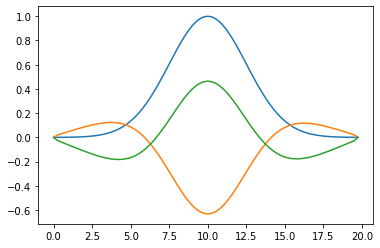

In [33]:
#this is my 2nd attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=0.01
x0=0
xmax=L
isteps=4*20
nsteps=2#0
dt=tmax/nsteps
dx=xmax/isteps
k=L**2/tmax
r=(k*dt)/(2*(dx)**2)
sigma=L/8
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
#t=np.zeros(nsteps)
T=np.zeros(isteps)

#T for t=0

    #T=np.exp((-1/2)*(xi**2)/(sigma)**2)


for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp((-1/2)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti
print(T)

#make array of arrays of T
Tn=[]
Tn.append(T)
print(Tn)

def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r
    RHS=np.zeros(isteps)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]
    RHS[0]=r*T[1]
    RHS[isteps-1]=r*T[isteps-2]
    D=np.matrix(RHS).T
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A =[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d = tridiag(A, B, C)
    I=npla.inv(d)#inverse matrix
    T1=I*D
    T1=np.array(T1.T)[0]
    T1[0]=0
    T1[-1]=0
    return T1

plt.plot(x[0:isteps],T)

for n in range(nsteps):#run crank for all t and plot for each
    print(T)
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],T)


plt.show()